# 1. Read Dataset

In [1]:
import pandas as pd
import os

base_dir = '../dataset/phase 2/'
file_path_1 = os.path.join(base_dir, 'df_translated_google_play.csv')
file_path_2 = os.path.join(base_dir, 'df_translated_app_store.csv')

df_1 = pd.read_csv(file_path_1)
df_2 = pd.read_csv(file_path_2)

# 2. Combine Dataset From Play Store and App Store


## 2.1. App Name Matching

In [2]:
df_1['app'] = df_1['app'].replace('Hazards - Red Cross', 'Hazards Red Cross')

df_2['app'] = df_2['app'].replace('GeoNet Quake', 'GeoNet')
df_2['app'] = df_2['app'].replace('Hazards – Red Cross', 'Hazards Red Cross')
df_2['app'] = df_2['app'].replace('Disaster Alert (PDC Global)', 'Disaster Alert')
df_2['app'] = df_2['app'].replace('Earthquake+ Alerts Map & Info', 'Earthquake + Alerts Map & Info')

## 2.2. Concat Play store and App Store dataset

In [3]:
df = pd.concat([df_1[['app', 'content', 'score']], df_2[['app', 'content', 'score']]], ignore_index = True).reset_index(drop = True)

# 3. Filter Natural Disaster App Dataset

In [4]:
pure_natural_disaster_app_name = ['Earthquake Alert!', 'My Earthquake Alerts - Map', 'Earthquakes Tracker', 'Yurekuru Call', 
                        'Wind Map Hurricane Tracker 3D', 'global storms', 'FEMA',
                        'Volcanoes & Earthquakes', 'Hazards Near Me NSW', 'Disaster Alert',
                        'Tropical Hurricane Tracker', 'GeoNet', 'My Hurricane Tracker & Alerts',
                        'Emergency: Severe Weather App', 'Hurricane Tracker', 'Hazards Red Cross',
                        'NINA - Die Warn-App des BBK', 'SeaStorm Hurricane Tracker', 'National evacuation center guide',
                        'My Hurricane Tracker Pro', 'Alert SA', 'Floods Near Me NSW', 'Safety tips',
                        'Earthquake', 'Earthquake + Alerts Map & Info', 'Natural Disaster Monitor',
                        'Earthquakes Today', 'FloodAlert Waterlevel Alerts', 'NERV Disaster Prevention', 
                        'SES Assistance QLD', 'Hurricane & Typhoon Track',
                        'QuakeFeed Earthquake Tracker', 'LastQuake', 'VIC Fires'
                       ]

natural_disaster_app_name = ['Earthquake Alert!', 'My Earthquake Alerts - Map', 'Earthquakes Tracker', 'Yurekuru Call', 
                        'Wind Map Hurricane Tracker 3D', 'global storms', 'FEMA',
                        'Volcanoes & Earthquakes', 'Hazards Near Me NSW', 'Disaster Alert',
                        'Tropical Hurricane Tracker', 'GeoNet', 'My Hurricane Tracker & Alerts',
                        'Emergency: Severe Weather App', 'Hurricane Tracker', 'Hazards Red Cross',
                        'NINA - Die Warn-App des BBK', 'SeaStorm Hurricane Tracker', 'National evacuation center guide',
                        'My Hurricane Tracker Pro', 'Alert SA', 'Floods Near Me NSW', 'Safety tips',
                        'Earthquake', 'Earthquake + Alerts Map & Info', 'Natural Disaster Monitor',
                        'Earthquakes Today', 'FloodAlert Waterlevel Alerts', 'NERV Disaster Prevention', 
                        'SES Assistance QLD', 'Hurricane & Typhoon Track',
                        'QuakeFeed Earthquake Tracker', 'LastQuake', 'VIC Fires', 
                        'VicEmergency', 'CodeRED Mobile Alert', 'myAlerts', 'SD Emergency',
                        'Emergency', 'Alertswiss', 'Alert2Me - Emergency Alerts', 'BD 999',
                        'KwiKam (Quicking Services)', 'Emergency Ready App', 'Anhaar'
                       ]

df_pure_natural_disaster = df[df.app.isin(pure_natural_disaster_app_name)]

df_natural_disaster = df[df.app.isin(natural_disaster_app_name)]
df_other_emergency = df[~df.app.isin(natural_disaster_app_name)]

## 4. Cleansing Dataset

In [5]:
def cleansing_dataset(df):
    df = df.drop_duplicates(subset=['content', 'app'])
    df = df.dropna(subset=['content'])
    df = df.assign(word_count=lambda x: x['content'].apply(lambda text: len(str(text).split()))).query('word_count > 4')
    df = df[['app', 'content', 'score']]
    df = df[df.score != 0].reset_index(drop = True)
    return df

df_natural_disaster = cleansing_dataset(df_natural_disaster)
df_other_emergency = cleansing_dataset(df_other_emergency)

In [6]:
df_natural_disaster

,app,content,score
0,Disaster Alert,Working as a Public Health Nurse I get to resp...,5
1,Disaster Alert,Nice to have before traveling to unknown terri...,5
2,Disaster Alert,I like! I'm trying to find anything about tsun...,5
3,Disaster Alert,good to have but what options are expected in ...,5
4,Disaster Alert,Shows hazards all right but refuses to send no...,2
...,...,...,...
28156,Earthquake,It works quite well even anticipates some othe...,5
28157,Earthquake,This application is very good.,5
28158,Earthquake,Data from earthquakes in Chile in the last 24 ...,2
28159,Earthquake,This is as good as earthquake apps can go. Thi...,5


In [7]:
set(df_natural_disaster.app)

{'Alert SA',
 'Alert2Me - Emergency Alerts',
 'Alertswiss',
 'Anhaar',
 'BD 999',
 'CodeRED Mobile Alert',
 'Disaster Alert',
 'Earthquake',
 'Earthquake + Alerts Map & Info',
 'Earthquake Alert!',
 'Earthquakes Today',
 'Earthquakes Tracker',
 'Emergency',
 'Emergency Ready App',
 'Emergency: Severe Weather App',
 'FEMA',
 'FloodAlert Waterlevel Alerts',
 'Floods Near Me NSW',
 'GeoNet',
 'Hazards Near Me NSW',
 'Hazards Red Cross',
 'Hurricane & Typhoon Track',
 'Hurricane Tracker',
 'KwiKam (Quicking Services)',
 'LastQuake',
 'My Earthquake Alerts - Map',
 'My Hurricane Tracker & Alerts',
 'My Hurricane Tracker Pro',
 'NERV Disaster Prevention',
 'NINA - Die Warn-App des BBK',
 'National evacuation center guide',
 'Natural Disaster Monitor',
 'QuakeFeed Earthquake Tracker',
 'SD Emergency',
 'SES Assistance QLD',
 'Safety tips',
 'SeaStorm Hurricane Tracker',
 'Tropical Hurricane Tracker',
 'VIC Fires',
 'VicEmergency',
 'Volcanoes & Earthquakes',
 'Wind Map Hurricane Tracker 3D',


In [8]:
df_other_emergency

,app,content,score
0,Emergency Alert,Use as part of CRT. Would be lost without this...,5
1,Emergency Alert,I've been using this app for many years and ne...,5
2,Emergency Alert,worked great until I updated the app. now it d...,3
3,Emergency Alert,Works Great very granular filters. I just wish...,5
4,Emergency Alert,Worked great for years then stopped working li...,5
...,...,...,...
46185,My Earthquake Alerts & Feed,Jau i uwas myself to use uthe this iup appeara...,5
46186,My Earthquake Alerts & Feed,Could color code the events to indicate time o...,3
46187,My Earthquake Alerts & Feed,Do they put South America and North America as...,1
46188,My Earthquake Alerts & Feed,This is a great app.Its is very informative an...,5


# 5. Exploratory Data Analysis

## 5.1. Count App Based on Emergency Type

In [9]:
total_pure_natural_disaster_app = len(set(df_pure_natural_disaster.app))
total_natural_disaster_app = len(set(df_natural_disaster.app))
total_other_emergency_app = len(set(df_other_emergency.app))

print("Total Pure Natural Disaster APP = ", total_pure_natural_disaster_app)
print("Total General Emergency App that has natural disaster feature = ", total_natural_disaster_app-total_pure_natural_disaster_app)
print("Total Natural Disaster APP after Adding General Emergency APP that has natural disaster feature = ", total_natural_disaster_app)
print("Total All APP = ", total_other_emergency_app+total_natural_disaster_app)

Total Pure Natural Disaster APP =  34
Total General Emergency App that has natural disaster feature =  11
Total Natural Disaster APP after Adding General Emergency APP that has natural disaster feature =  45
Total All APP =  99


## 5.2. Total Reviews

In [10]:
print("Total Pure Natural Disaster APP = ", len(df_natural_disaster))

Total Pure Natural Disaster APP =  28161


## 5.3. Total Reviews Based on Store and Cleansing Data

In [11]:
import pandas as pd
import os

base_dir = '../dataset/phase 2/'
file_path_1 = os.path.join(base_dir, 'df_translated_google_play.csv')
file_path_2 = os.path.join(base_dir, 'df_translated_app_store.csv')

df_1 = pd.read_csv(file_path_1)
df_2 = pd.read_csv(file_path_2)

df_1['app'] = df_1['app'].replace('Hazards - Red Cross', 'Hazards Red Cross')

df_2['app'] = df_2['app'].replace('GeoNet Quake', 'GeoNet')
df_2['app'] = df_2['app'].replace('Hazards – Red Cross', 'Hazards Red Cross')
df_2['app'] = df_2['app'].replace('Disaster Alert (PDC Global)', 'Disaster Alert')
df_2['app'] = df_2['app'].replace('Earthquake+ Alerts Map & Info', 'Earthquake + Alerts Map & Info')

df_1['source'] = 'Google Playstore'
df_2['source'] = 'App Store'

df = pd.concat([df_1[['app', 'content', 'score', 'source']], df_2[['app', 'content', 'score', 'source']]], ignore_index = True).reset_index(drop = True)

natural_disaster_app_name = ['Earthquake Alert!', 'My Earthquake Alerts - Map', 'Earthquakes Tracker', 'Yurekuru Call', 
                        'Wind Map Hurricane Tracker 3D', 'global storms', 'FEMA',
                        'Volcanoes & Earthquakes', 'Hazards Near Me NSW', 'Disaster Alert',
                        'Tropical Hurricane Tracker', 'GeoNet', 'My Hurricane Tracker & Alerts',
                        'Emergency: Severe Weather App', 'Hurricane Tracker', 'Hazards Red Cross',
                        'NINA - Die Warn-App des BBK', 'SeaStorm Hurricane Tracker', 'National evacuation center guide',
                        'My Hurricane Tracker Pro', 'Alert SA', 'Floods Near Me NSW', 'Safety tips',
                        'Earthquake', 'Earthquake + Alerts Map & Info', 'Natural Disaster Monitor',
                        'Earthquakes Today', 'FloodAlert Waterlevel Alerts', 'NERV Disaster Prevention', 
                        'SES Assistance QLD', 'Hurricane & Typhoon Track',
                        'QuakeFeed Earthquake Tracker', 'LastQuake', 'VIC Fires', 'VicEmergency', 'CodeRED Mobile Alert', 'myAlerts', 'SD Emergency',
                        'Emergency', 'Alertswiss', 'Alert2Me - Emergency Alerts', 'BD 999',
                        'KwiKam (Quicking Services)', 'Emergency Ready App', 'Anhaar'
                       ]

df = df[df.app.isin(natural_disaster_app_name)]

In [12]:
df.groupby(['source']).count()

,app,content,score
source,,,
App Store,6834,6833,6834
Google Playstore,30438,30436,30438


In [13]:
print("Total reviews before pre-processing", len(df))

Total reviews before pre-processing 37272


In [14]:
df = df.drop_duplicates(subset=['content', 'app'])
df = df.dropna(subset=['content'])
df = df.assign(word_count=lambda x: x['content'].apply(lambda text: len(str(text).split()))).query('word_count > 4')
df = df[['app', 'content', 'score']]
print("Total data after removing empty and short reviews", len(df))

Total data after removing empty and short reviews 28163


In [15]:
result = len(df[df.score != 0].reset_index(drop = True))
print("Total data after removing zero star reviews", result)

Total data after removing zero star reviews 28161


## 5.4. Total Reviews Based on Languange

In [16]:
non_english_app = ['112 BE', '112 Bulgaria', '112 Georgia', 'Afad Acil Cagri', 'Anhaar', 'Alertswiss', 
                   'DEC112 2.0', 'Earthquake', 'EletMento', 'help is nearby!', 'Hjelp 113', 'Jakarta Aman', 
                   'My Earthquake Alerts & Feed', 'National evacuation center guide', 
                   'SAC Argentina', 'SOS Alarm','Yurekuru Call', 'Zachranka']

df_non_english_app = df_natural_disaster[df_natural_disaster.app.isin(non_english_app)]
df_english_app = df_natural_disaster[~df_natural_disaster.app.isin(non_english_app)]

In [17]:
print("Total Reviews for Non-English App", len(df_non_english_app))
print("Total Reviews for English App", len(df_english_app))

Total Reviews for Non-English App 2793
Total Reviews for English App 25368


In [18]:
print("Total app that need to be translated", len(non_english_app))

Total app that need to be translated 18


## 5.5. Looking Short Reviews Under 4 Words

In [19]:
df_natural_disaster.assign(word_count=lambda x: x['content'].apply(lambda text: len(str(text).split()))).query('word_count <= 4')


,app,content,score,word_count


## 5.6. Number of Downloads and Ratings

In [20]:
import pandas as pd

data = {
    "App Name": ["Earthquake Alert!", "My Earthquake Alerts", "Earthquakes Tracker", "Yurekuru Call", "Wind Map Hurricane Tracker 3D", "global storms", "FEMA", "Volcanoes & Earthquakes", "Hazards Near Me NSW", "Disaster Alert", "Tropical Hurricane Tracker", "GeoNet", "My Hurricane Tracker & Alerts", "Emergency: Severe Weather App", "Hurricane Tracker", "Hazards Red Cross", "NINA - Die Warn-App des BBK", "SeaStorm Hurricane Tracker", "National evacuation center guide", "My Hurricane Tracker Pro", "Alert SA", "Floods Near Me NSW", "Safety tips", "Earthquake", "Earthquake + Alerts Map & Info", "Natural Disaster Monitor", "Earthquakes Today", "FloodAlert Waterlevel Alerts", "NERV Disaster Prevention", "SES Assistance QLD", "Hurricane & Typhoon Track", "112 India", "VicEmergency", "CodeRED Mobile Alert", "myAlerts", "SD Emergency", "Emergency", "Alertswiss", "Alert2Me - Emergency Alerts", "BD 999", "KwiKam (Quicking Services)", "Emergency Ready App", "Anhaar"],
    "Downloads": ["1M+", "5M+", "500K+", "1M+", "1M+", "1M+", "1M+", "1M+", "1M+", "500K+", "100K+", "100K+", "500K+", "100K+", "10K+", "50K+", "5M+", "10K+", "100K+", "5K+", "100K+", "50K+", "100K+", "100K+", "100K+", "50K+", "100K+", "100K+", "1M+", "10K+", "100K+", "1M+", "1M+", "500K+", "50K+", "50K+", "10K+", "500K+", "10K+", "10K+", "", "10K+", "10K+"],
    "Rating": [4.6, 4.7, 4.5, 4.4, 4.3, 4.4, 3.8, 4.4, 2.5, 4.1, 4.9, 4.1, 4.7, 3.7, 4.3, 3.1, 2.6, 4.1, 3.3, 4.7, 3.5, 2.1, 2.3, 4.1, 4.1, 3.5, 4.4, 4.2, 4.6, 3.1, 3.8, 3.9, 3.3, 2.8, 3.5, 3.5, 4.2, 4.1, 3.5, 5, None, 3.5, 4.7]
}

# Function to convert Downloads
def convert_downloads(value):
    if 'M' in value:
        return int(float(value.replace('M+', '')) * 1000000)
    elif 'K' in value:
        return int(float(value.replace('K+', '')) * 1000)
    return value  # Just in case there's a value without 'K' or 'M'

# Apply conversion to the 'Downloads' column
data['Downloads'] = [convert_downloads(x) for x in data['Downloads']]

# Create DataFrame
df_1 = pd.DataFrame(data, columns=['App Name', 'Downloads', 'Rating'])
df_1 = df_1[df_1['App Name']!='KwiKam (Quicking Services)']
df_1 = df_1[df_1['App Name']!='PREP']
df_1 = df_1[df_1['App Name']!='112 India']
df_1['Source'] = 'Play Store'

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10392 non-null  int64 
 1   app      10392 non-null  object
 2   content  10386 non-null  object
 3   score    10392 non-null  int64 
 4   source   10392 non-null  object
dtypes: int64(2), object(3)
memory usage: 406.1+ KB


In [22]:
import pandas as pd

data = [
    {"App Name": "My Earthquake Alerts & Feed", "Downloads": 405, "Rating": 4.6},
    {"App Name": "Hazards Near Me NSW", "Downloads": 1100, "Rating": 3.3},
    {"App Name": "Disaster Alert (PDC Global)", "Downloads": 26, "Rating": 3.8},
    {"App Name": "GeoNet Quake", "Downloads": 465, "Rating": 4.8},
    {"App Name": "Alert SA", "Downloads": 129, "Rating": 2.3},
    {"App Name": "Safety tips", "Downloads": 13, "Rating": 2.3},
    {"App Name": "Earthquake", "Downloads": 1700, "Rating": 4.8},
    {"App Name": "Earthquake+ Alerts, Map & Info", "Downloads": 790, "Rating": 4.6},
    {"App Name": "SES Assistance QLD", "Downloads": 6, "Rating": 1.7},
    {"App Name": "QuakeFeed Earthquake Tracker", "Downloads": 1100, "Rating": 4.7},
    {"App Name": "LastQuake", "Downloads": 104, "Rating": 4.7},
    {"App Name": "VIC Fires", "Downloads": 6400, "Rating": 4.7},
    {"App Name": "PREP", "Downloads": 6, "Rating": 2.3},
    {"App Name": "112 India", "Downloads": 24, "Rating": 2.5},
    {"App Name": "VicEmergency", "Downloads": 614, "Rating": 2.9},
    {"App Name": "Alertswiss", "Downloads": 522, "Rating": 3.7},
    {"App Name": "Alert2Me - Emergency Alerts", "Downloads": 57, "Rating": 3.2},
    {"App Name": "Emergency Ready App", "Downloads": 15, "Rating": 2.8}
]

# Create DataFrame
df_2 = pd.DataFrame(data)
df_2['Source'] = 'App Store'
df_2 = df_2[df_2['App Name']!='PREP']
df_2 = df_2[df_2['App Name']!='112 India']

In [23]:
df = pd.concat([df_1, df_2], ignore_index = True).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   App Name   57 non-null     object 
 1   Downloads  57 non-null     object 
 2   Rating     57 non-null     float64
 3   Source     57 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.9+ KB


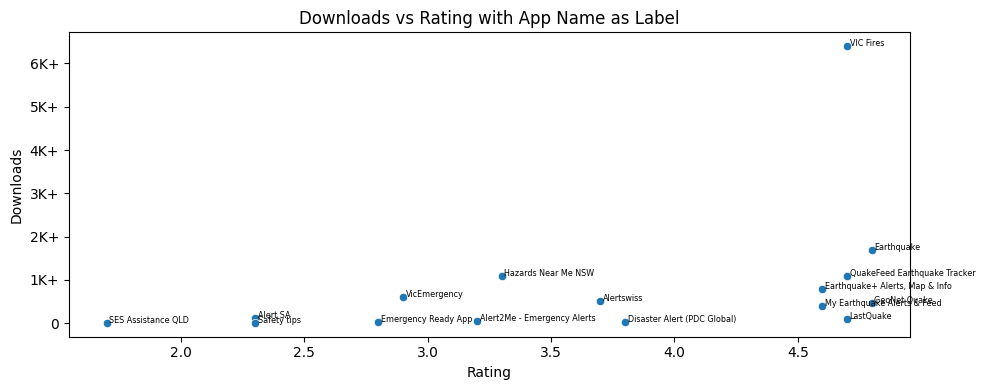

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



temp_df = df_2.copy()

# Function to convert downloads string to numeric
def convert_downloads(download_str):
    if isinstance(download_str, (int, float)):
        return download_str
    if 'M+' in download_str:
        return float(download_str.replace('M+', '')) * 1e6
    elif 'K+' in download_str:
        return float(download_str.replace('K+', '')) * 1e3
    return float(download_str) # Handling direct number input for edge cases

# Apply the conversion to ensure all values are numeric
temp_df['Downloads'] = temp_df['Downloads'].apply(convert_downloads)

# Set the size of the plot
plt.figure(figsize=(10, 4))

# Create scatter plot
plot = sns.scatterplot(data=temp_df, x='Rating', y='Downloads')

# Iterate over the DataFrame to add App Name labels to each point, based on 'Show Label' condition
for i, row in temp_df.iterrows():
        plt.text(row['Rating'] + 0.01, row['Downloads'], row['App Name'], 
                 horizontalalignment='left', size='xx-small', color='black', weight='normal')

# Custom formatter for the y-axis to display 'M+' for millions and 'K+' for thousands
def y_formatter(y, _):
    if y >= 1e6:
        return f'{int(y/1e6)}M+'
    elif y >= 1e3:
        return f'{int(y/1e3)}K+'
    return str(int(y))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_formatter))

plt.title('Downloads vs Rating with App Name as Label')
plt.xlabel('Rating')
plt.ylabel('Downloads')

plt.tight_layout()
#plt.savefig('../output/DownloadsRating.png', dpi=300, bbox_inches='tight')
plt.show()


In [25]:
set(df_2['App Name'])

{'Alert SA',
 'Alert2Me - Emergency Alerts',
 'Alertswiss',
 'Disaster Alert (PDC Global)',
 'Earthquake',
 'Earthquake+ Alerts, Map & Info',
 'Emergency Ready App',
 'GeoNet Quake',
 'Hazards Near Me NSW',
 'LastQuake',
 'My Earthquake Alerts & Feed',
 'QuakeFeed Earthquake Tracker',
 'SES Assistance QLD',
 'Safety tips',
 'VIC Fires',
 'VicEmergency'}

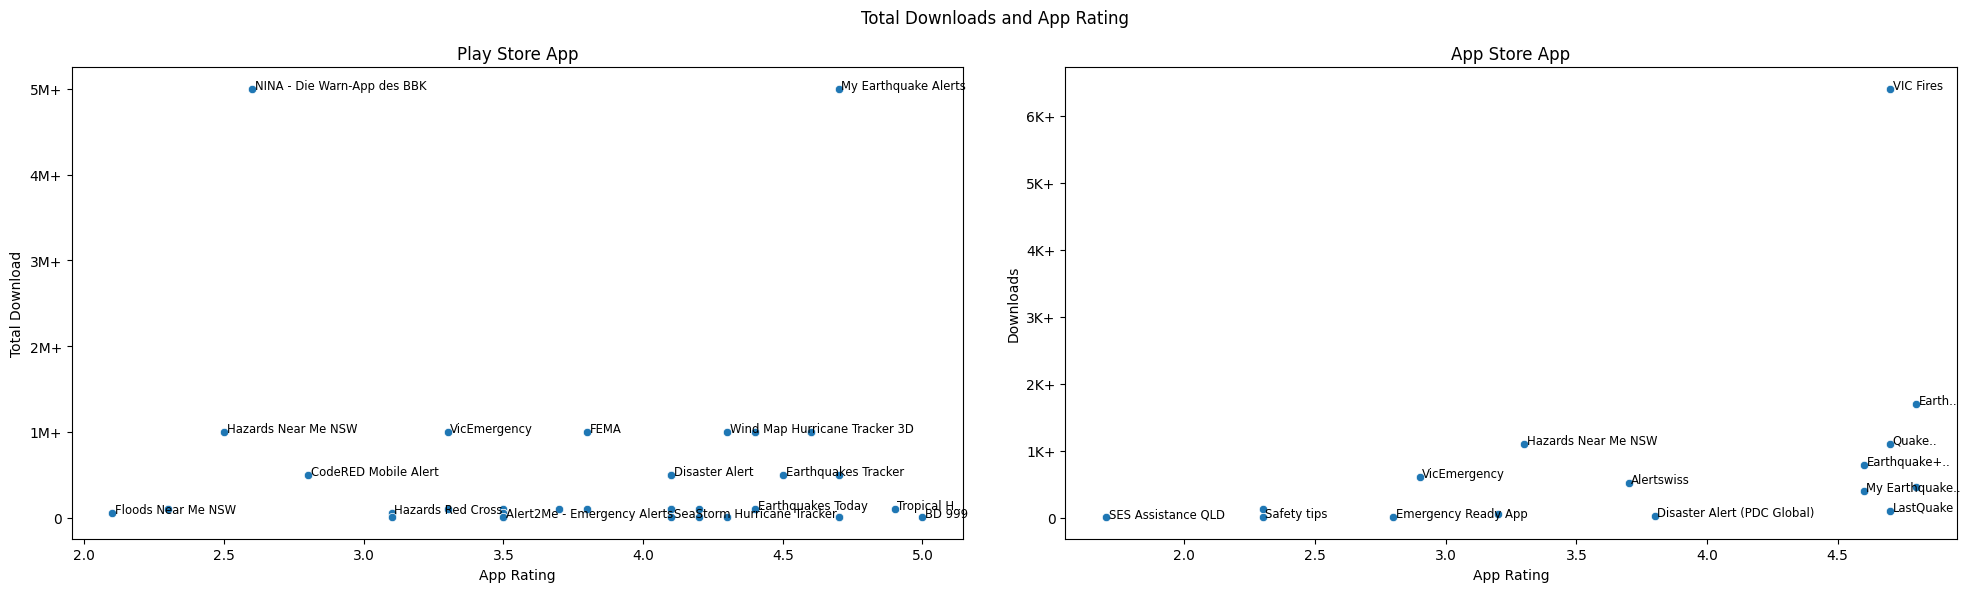

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Function to convert downloads string to numeric
def convert_downloads(download_str):
    if isinstance(download_str, (int, float)):
        return download_str
    if 'M+' in download_str:
        return float(download_str.replace('M+', '')) * 1e6
    elif 'K+' in download_str:
        return float(download_str.replace('K+', '')) * 1e3
    return float(download_str)  # Handling direct number input for edge cases

# Apply the conversion to ensure all values are numeric
df['Downloads'] = df['Downloads'].apply(convert_downloads)

# Define the custom formatter for the y-axis
def y_formatter(y, _):
    if y >= 1e6:
        return f'{int(y/1e6)}M+'
    elif y >= 1e3:
        return f'{int(y/1e3)}K+'
    return str(int(y))

# Filter the DataFrame by source
df_play_store = df[df['Source'] == 'Play Store']
df_app_store = df[df['Source'] == 'App Store']

df_play_store['App Name'] = df_play_store['App Name'].replace('Tropical Hurricane Tracker', 'Tropical H..')


df_play_store['Show Label_1'] = df_play_store['App Name'].apply(lambda x: x in ["NINA - Die Warn-App des BBK", "My Earthquake Alerts",
                                                       "Hazards Near Me NSW", "VicEmergency",
                                                       "Floods Near Me NSW", "Wind Map Hurricane Tracker 3D",
                                                       "CodeRED Mobile Alert", "Disaster Alert", "",
                                                       "Earthquakes Today", "Earthquakes Tracker",
                                                       "Hazards Red Cross", "Alert2Me - Emergency Alerts",
                                                        "BD 999", "FEMA", "SeaStorm Hurricane Tracker",
                                                         "Tropical H.."])

df_app_store['App Name'] = df_app_store['App Name'].replace('My Earthquake Alerts & Feed', 'My Earthquake..')
df_app_store['App Name'] = df_app_store['App Name'].replace('Earthquake+ Alerts, Map & Info', 'Earthquake+..')
df_app_store['App Name'] = df_app_store['App Name'].replace('QuakeFeed Earthquake Tracker', 'Quake..')
df_app_store['App Name'] = df_app_store['App Name'].replace('Earthquake', 'Earth..')

df_app_store['Show Label_2'] = df_app_store['App Name'].apply(lambda x: x in ["SES Assistance QLD",
                                                                             "Safety tips",
                                                                             "Emergency Ready App",
                                                                             "Disaster Alert (PDC Global)",
                                                                             "Alertswiss",
                                                                             "My Earthquake..", 'VIC Fires',
                                                                             "Hazards Near Me NSW",
                                                                             "VicEmergency", "Earth..",
                                                                             "LastQuake", 'Earthquake+..',
                                                                             'Quake..'])


# Set up the subplot figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=False)

# Plot for Play Store
sns.scatterplot(data=df_play_store, x='Rating', y='Downloads', ax=axes[0])
axes[0].set_title('Play Store App')
axes[0].set_xlabel('App Rating')  # Set x-axis label
axes[0].set_ylabel('Total Download')  # Set y-axis label

axes[0].yaxis.set_major_formatter(plt.FuncFormatter(y_formatter))

# Plot for App Store
sns.scatterplot(data=df_app_store, x='Rating', y='Downloads', ax=axes[1])
axes[1].set_title('App Store App')
axes[1].set_xlabel('App Rating')  # Set x-axis label
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(y_formatter))

# Add labels to each point based on 'Show Label_1' for Play Store and 'Show Label_2' for App Store
for ax, df_subset, label_column in zip(axes, [df_play_store, df_app_store], ['Show Label_1', 'Show Label_2']):
    for i, row in df_subset.iterrows():
        if row[label_column]:  # Use the appropriate 'Show Label' column based on the source
            ax.text(row['Rating'] + 0.01, row['Downloads'], row['App Name'],
                    horizontalalignment='left', size='small', color='black', weight='normal')

plt.suptitle('Total Downloads and App Rating')
plt.tight_layout()
#plt.savefig('../output/Download_vs_Rating.png', dpi=300, bbox_inches='tight')
plt.show()



In [27]:
df

,App Name,Downloads,Rating,Source
0,Earthquake Alert!,1000000,4.6,Play Store
1,My Earthquake Alerts,5000000,4.7,Play Store
2,Earthquakes Tracker,500000,4.5,Play Store
3,Yurekuru Call,1000000,4.4,Play Store
4,Wind Map Hurricane Tracker 3D,1000000,4.3,Play Store
5,global storms,1000000,4.4,Play Store
6,FEMA,1000000,3.8,Play Store
7,Volcanoes & Earthquakes,1000000,4.4,Play Store
8,Hazards Near Me NSW,1000000,2.5,Play Store
9,Disaster Alert,500000,4.1,Play Store


In [30]:
df[df.Source == 'Play Store'].describe()

,Downloads,Rating
count,4.100000e+01,41.000000
mean,5.593902e+05,3.878049
std,1.090226e+06,0.733319
min,5.000000e+03,2.100000
25%,5.000000e+04,3.500000
50%,1.000000e+05,4.100000
75%,1.000000e+06,4.400000
max,5.000000e+06,5.000000


In [31]:
df[df.Source == 'App Store'].describe()

,Downloads,Rating
count,16.000000,16.000000
mean,840.375000,3.681250
std,1563.243631,1.059068
min,6.000000,1.700000
25%,49.250000,2.875000
50%,435.000000,3.750000
75%,867.500000,4.700000
max,6400.000000,4.800000


In [32]:
df

,App Name,Downloads,Rating,Source
0,Earthquake Alert!,1000000,4.6,Play Store
1,My Earthquake Alerts,5000000,4.7,Play Store
2,Earthquakes Tracker,500000,4.5,Play Store
3,Yurekuru Call,1000000,4.4,Play Store
4,Wind Map Hurricane Tracker 3D,1000000,4.3,Play Store
5,global storms,1000000,4.4,Play Store
6,FEMA,1000000,3.8,Play Store
7,Volcanoes & Earthquakes,1000000,4.4,Play Store
8,Hazards Near Me NSW,1000000,2.5,Play Store
9,Disaster Alert,500000,4.1,Play Store


## 5.7. Spearman Rank Correlation

In [33]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming df is your DataFrame containing the relevant columns

# Subset DataFrame for Play Store
play_store_df = df[df['Source'] == 'Play Store']

# Calculate Spearman correlation for Play Store
play_store_correlation = spearmanr(play_store_df['Downloads'], play_store_df['Rating']).correlation

print("Spearman correlation for Play Store:", play_store_correlation)

# Subset DataFrame for App Store
app_store_df = df[df['Source'] == 'App Store']

# Calculate Spearman correlation for App Store
app_store_correlation = spearmanr(app_store_df['Downloads'], app_store_df['Rating']).correlation

print("Spearman correlation for App Store:", app_store_correlation)


Spearman correlation for Play Store: 0.07947861900897771
Spearman correlation for App Store: 0.6464560700488396
